# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Indradi Rahmatullah
- Email: indradirhm@gmail.com
- Id Dicoding: indradi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/labibaf/Sudent_Performance_Analysis/main/dataset/data.csv',delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**4424 Rows, 37 Columns**

In [3]:
df.shape

(4424, 37)

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Check Duplicate
df.duplicated().sum()

0

In [6]:
# Check NA values
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


## Data Preparation / Preprocessing

In [7]:
def copy_dataframe(df):
  return df.copy()

### Decode Dataset (New Data)

In [8]:
# Mapping dictionaries for various columns

# Marital status mapping
marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

# Application mode mapping
application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Course mapping
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

In [9]:
# Daytime/Evening attendance mapping
daytime_evening_mapping = {
    1: 'daytime',
    0: 'evening'
}

# Previous qualification mapping
previous_qualification_mapping = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Nationality mapping
nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

In [10]:
# Qualification mapping for both parents
qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-Professional Course',
    26: '7th Year of Schooling',
    27: '2nd Cycle of the General High School Course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    34: 'Unknown',
    35: 'Can\'t Read or Write',
    36: 'Can Read Without Having a 4th Year of Schooling',
    37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)',
    44: 'Higher Education - Doctorate (3rd Cycle)'
}

# Occupation mapping for both parents
occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

In [11]:
# Mapping for yes/no fields
yes_no_mapping = {
    1: 'yes',
    0: 'no'
}

# Mapping for gender
gender_mapping = {
    1: 'male',
    0: 'female'
}

In [12]:
# Function to decode marital status
def decode_marital_status(df):
    df['Marital_status'] = df['Marital_status'].map(marital_status_mapping)
    return df

# Function to decode application mode
def decode_application_mode(df):
    df['Application_mode'] = df['Application_mode'].map(application_mode_mapping)
    return df

# Function to decode course
def decode_course(df):
    df['Course'] = df['Course'].map(course_mapping)
    return df

# Function to decode daytime/evening attendance
def decode_daytime_evening(df):
    df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(daytime_evening_mapping)
    return df

In [13]:
# Function to decode previous qualification
def decode_previous_qualification(df):
    df['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_mapping)
    return df

# Function to decode nationality
def decode_nationality(df):
    df['Nacionality'] = df['Nacionality'].map(nationality_mapping)
    return df

# Function to decode parents' qualifications
def decode_qualification(df):
    df['Mothers_qualification'] = df['Mothers_qualification'].map(qualification_mapping)
    df['Fathers_qualification'] = df['Fathers_qualification'].map(qualification_mapping)
    return df

# Function to decode parents' occupations
def decode_occupation(df):
    df['Mothers_occupation'] = df['Mothers_occupation'].map(occupation_mapping)
    df['Fathers_occupation'] = df['Fathers_occupation'].map(occupation_mapping)
    return df

In [14]:
# Function to decode yes/no fields
def decode_yes_no_fields(df):
    df['Displaced'] = df['Displaced'].map(yes_no_mapping)
    df['Educational_special_needs'] = df['Educational_special_needs'].map(yes_no_mapping)
    df['Debtor'] = df['Debtor'].map(yes_no_mapping)
    df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(yes_no_mapping)
    df['Scholarship_holder'] = df['Scholarship_holder'].map(yes_no_mapping)
    df['International'] = df['International'].map(yes_no_mapping)
    return df

# Function to decode gender
def decode_gender(df):
    df['Gender'] = df['Gender'].map(gender_mapping)
    return df

In [15]:
# Main function to decode the entire DataFrame
def decode_dataframe(df):
    df = copy_dataframe(df)
    df = decode_marital_status(df)
    df = decode_application_mode(df)
    df = decode_course(df)
    df = decode_daytime_evening(df)
    df = decode_previous_qualification(df)
    df = decode_nationality(df)
    df = decode_qualification(df)
    df = decode_occupation(df)
    df = decode_yes_no_fields(df)
    df = decode_gender(df)
    return df

In [16]:
decoded_df=decode_dataframe(df)
decoded_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
# Calculate the sum of each value in the 'Status' column.
status_counts_before = df['Status'].value_counts()
print(status_counts_before)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [18]:
# Deleting rows where the 'Status' column has the value 'Enrolled'
df = df[df['Status'] != 'Enrolled']

In [19]:
# Recalculate the sum of each value in the 'Status' column after deletion.
status_counts_after = df['Status'].value_counts()
print(status_counts_after)

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


In [20]:
# Displays first 5 lines (default)
display(df.head())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Export New Dataset to CSV

In [21]:
# Export decoded DataFrame to CSV file
decoded_df.to_csv('newEduDataset.csv', index=False)

## Modeling

In [22]:
# Features (e.g., all columns except 'Status')
X = df.drop('Status', axis=1)

# Target (column to be predicted)
y = df['Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Creating a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

In [24]:
# Predicting the test set
y_pred = rf_model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

     Dropout       0.91      0.82      0.86       414
    Graduate       0.90      0.95      0.92       675

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



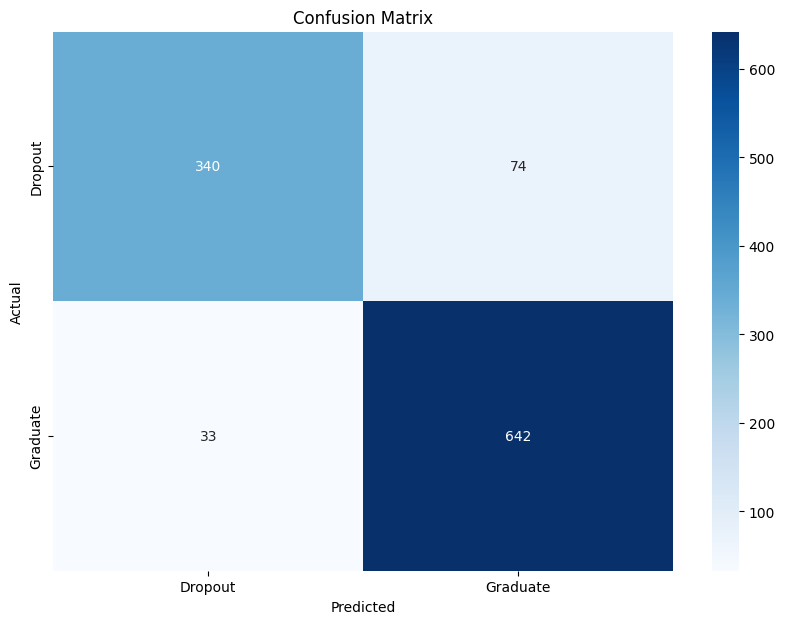

In [25]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Saving Random Forest model to joblib file
joblib_file = "random_forest_model.joblib"
joblib.dump(rf_model, joblib_file)

['random_forest_model.joblib']